# SEIS735_Project_LDA/Cluster_Level4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Depression_ICD9.csv')
# pd.set_option('display.max_column',100)

df.head(5)

,DESYNPUF_ID,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10
0,0007CE3DD280CE99,4580,2724,73300,2859,311,V142,NaN,NaN,NaN,NaN
1,0016DB4139E8DC3B,43310,37741,34290,V1251,2724,43411,V4511,4271,NaN,NaN
2,0016DB4139E8DC3B,49121,4821,2724,V5861,7245,V1588,4019,5853,NaN,NaN
3,001E7468C7298570,38611,4019,38830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001E7468C7298570,4359,41401,2724,29040,27651,V1005,58381,43310,4370,NaN


In [3]:
# Change data type for ICD9 CODE
data = df.drop(['DESYNPUF_ID'],axis = 1)
data['ICD9_DGNS_CD_1'] = data['ICD9_DGNS_CD_1'].astype(str)
data['ICD9_DGNS_CD_2'] = data['ICD9_DGNS_CD_1'].astype(str)

In [4]:
data.head(5)

,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10
0,4580,4580,73300,2859,311,V142,NaN,NaN,NaN,NaN
1,43310,43310,34290,V1251,2724,43411,V4511,4271,NaN,NaN
2,49121,49121,2724,V5861,7245,V1588,4019,5853,NaN,NaN
3,38611,38611,38830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4359,4359,2724,29040,27651,V1005,58381,43310,4370,NaN


In [5]:
data.shape

(15000, 10)

In [6]:
data.columns

Index(['ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10'],
      dtype='object')

In [7]:
missing_value=data['ICD9_DGNS_CD_8'].isnull().sum()
missing_value

3322

In [8]:
# Delete those procedures
for i in data.columns:
    data[i][data[i].str.contains('V', na=False)] = ''
    data[i][data[i].str.contains('E', na=False)] = ''
    data[i] = data[i].str.lstrip('0')

In [9]:
# Cut to four and five numbers(ICD9_Code) for Level4
data_4 = data.copy()
for i in data_4.columns:
    data_4[i][data_4[i].str.len() == 3] = ''

## Doing LDA with the Level 4

In [10]:
# Preparation datatset
cols = []
for i in data_4.columns:
    cols.append(i)
    
# Combine all ICD9_CODE into an array
data_4['New'] = [x[pd.notna(x)].tolist() for x in data_4.values]
processed_docs = data_4['New']
processed_docs

0                            [4580, 4580, 73300, 2859, , ]
1             [43310, 43310, 34290, , 2724, 43411, , 4271]
2               [49121, 49121, 2724, , 7245, , 4019, 5853]
3                                    [38611, 38611, 38830]
4        [4359, 4359, 2724, 29040, 27651, , 58381, 4331...
                               ...                        
14995    [25060, 25060, 2767, 6827, 30000, 2720, 78820,...
14996            [, , 3209, 2760, 49322, 51884, 78552, , ]
14997    [2788, 2788, 3004, 5853, 4019, 2449, 1977, 553...
14998    [29620, 29620, , 33390, 30981, 4280, 3320, 401...
14999       [, , 40391, 5849, 78552, 2948, 42732, , 27651]
Name: New, Length: 15000, dtype: object

In [11]:
# Preparation for LDA
from gensim import corpora

dictionary = corpora.Dictionary(processed_docs)
dictionary.token2id

{'': 0,
 '2859': 1,
 '4580': 2,
 '73300': 3,
 '2724': 4,
 '34290': 5,
 '4271': 6,
 '43310': 7,
 '43411': 8,
 '4019': 9,
 '49121': 10,
 '5853': 11,
 '7245': 12,
 '38611': 13,
 '38830': 14,
 '27651': 15,
 '29040': 16,
 '4359': 17,
 '4370': 18,
 '58381': 19,
 '5609': 20,
 '7802': 21,
 '9974': 22,
 '2449': 23,
 '29680': 24,
 '4240': 25,
 '4280': 26,
 '42842': 27,
 '4439': 28,
 '5854': 29,
 '8052': 30,
 '24290': 31,
 '25060': 32,
 '3051': 33,
 '53081': 34,
 '72402': 35,
 '42731': 36,
 '53011': 37,
 '5859': 38,
 '78720': 39,
 '4779': 40,
 '57400': 41,
 '60000': 42,
 '3079': 43,
 '3331': 44,
 '36900': 45,
 '43491': 46,
 '43811': 47,
 '5070': 48,
 '51884': 49,
 '41071': 50,
 '4254': 51,
 '4588': 52,
 '78605': 53,
 '99668': 54,
 '2761': 55,
 '28529': 56,
 '41401': 57,
 '5559': 58,
 '78057': 59,
 '29630': 60,
 '2762': 61,
 '4184': 62,
 '51881': 63,
 '5849': 64,
 '5856': 65,
 '73007': 66,
 '99832': 67,
 '25000': 68,
 '2800': 69,
 '2948': 70,
 '3970': 71,
 '58881': 72,
 '78609': 73,
 '29530': 74,


In [12]:
corpus = [dictionary.doc2bow(code) for code in processed_docs]
corpus

[[(0, 2), (1, 1), (2, 2), (3, 1)],
 [(0, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1)],
 [(0, 2), (4, 1), (9, 1), (10, 2), (11, 1), (12, 1)],
 [(13, 2), (14, 1)],
 [(0, 1), (4, 1), (7, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1)],
 [(4, 1), (20, 2)],
 [(9, 1), (21, 2), (22, 1)],
 [(0, 2), (9, 1), (23, 1), (24, 2), (25, 1)],
 [(0, 1), (4, 1), (9, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1)],
 [(0, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2)],
 [(9, 1), (26, 1), (36, 2), (37, 1), (38, 1), (39, 1)],
 [(0, 2), (9, 1), (23, 1), (36, 1), (40, 1), (41, 2), (42, 1)],
 [(0, 2)],
 [(0, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1)],
 [(4, 1), (18, 1), (26, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1)],
 [(0, 1), (3, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1)],
 [(60, 2)],
 [(0, 1),
  (52, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1)],
 [(26, 1), (50, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)],
 [(33, 1), (34,

In [13]:
# Train LDA model
import gensim.models.ldamodel as lda
model = lda.LdaModel(corpus, id2word=dictionary, num_topics=4)

# Show all topics
model.show_topics()

[(0,
  '0.115*"" + 0.040*"4019" + 0.032*"49121" + 0.022*"4280" + 0.021*"2724" + 0.018*"43491" + 0.017*"25000" + 0.014*"5070" + 0.013*"41401" + 0.013*"3051"'),
 (1,
  '0.143*"" + 0.042*"4019" + 0.035*"41401" + 0.023*"2724" + 0.021*"25000" + 0.020*"5990" + 0.018*"53081" + 0.015*"71536" + 0.014*"2449" + 0.012*"2761"'),
 (2,
  '0.121*"" + 0.041*"4019" + 0.025*"27651" + 0.025*"2724" + 0.023*"5990" + 0.020*"25000" + 0.018*"41401" + 0.016*"53081" + 0.014*"2449" + 0.013*"42731"'),
 (3,
  '0.172*"" + 0.031*"5849" + 0.031*"4280" + 0.027*"42731" + 0.025*"4019" + 0.024*"5990" + 0.018*"25000" + 0.015*"41401" + 0.012*"51881" + 0.012*"2724"')]

In [14]:
# Show the specific topic with the specific number of items
topic1 = model.print_topic(0, topn=10) #(the specific topic, number of items)
topic1

'0.115*"" + 0.040*"4019" + 0.032*"49121" + 0.022*"4280" + 0.021*"2724" + 0.018*"43491" + 0.017*"25000" + 0.014*"5070" + 0.013*"41401" + 0.013*"3051"'

## Plot Word cloud

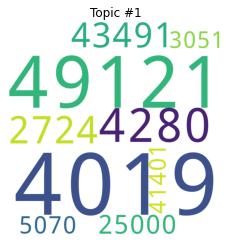

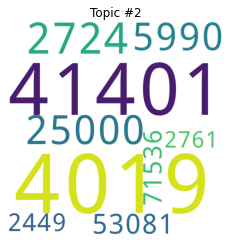

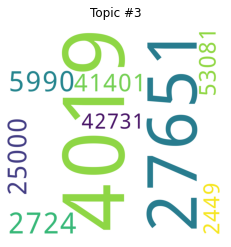

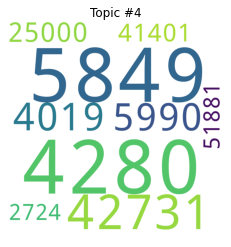

In [15]:
from wordcloud import WordCloud

for t in range(model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white',  #color of the canvas.
                         width=1000,  # width of the canvas.
                         height=1000  # height of the canvas.
                         ).fit_words(dict(model.show_topic(t, 10))))
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    plt.show()

# Prepare for Clutering

In [16]:
# Get probability of our dataset based on topics
prob=[]
for i in range(len(corpus)):
    prob.append(model.get_document_topics(corpus[i]))

DF = pd.DataFrame([])
col = ['One','Two','Three','Four']
ind = []
val = []
for k in range(len(prob)):
    b = prob[k]
    for i in range(len(b)):
        ind.append(b[i][0])
        val.append(b[i][1])
n = np.transpose(np.array(val).reshape(len(prob),len(b)))
for i in range(len(col)):
    DF[col[i]] = n[i]
n = np.transpose(n)

DF.head(30)

,One,Two,Three,Four
0,0.037396,0.038565,0.886373,0.037665
1,0.030063,0.030030,0.775175,0.164732
2,0.809822,0.029153,0.030082,0.130943
3,0.812453,0.062516,0.062516,0.062514
4,0.026286,0.025425,0.922771,0.025518
5,0.063788,0.808883,0.064125,0.063204
6,0.051612,0.050856,0.842247,0.055285
7,0.033187,0.900626,0.033160,0.033028
8,0.618244,0.328665,0.026524,0.026567
9,0.029682,0.912138,0.029342,0.028838


In [17]:
# Cluster 3 groups
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(DF)
y_kmeans = kmeans.predict(DF)
centers = kmeans.cluster_centers_
labels = kmeans.fit(DF)

In [18]:
centers

array([[0.08691742, 0.07464862, 0.08081542, 0.75761855],
       [0.39363164, 0.4153404 , 0.08658823, 0.10443959],
       [0.08640061, 0.08680383, 0.7205677 , 0.10622783]], dtype=float32)

In [19]:
label = labels.labels_
label

array([0, 0, 1, ..., 1, 0, 2], dtype=int32)

In [20]:
DF['label']=label
DF

,One,Two,Three,Four,label
0,0.037396,0.038565,0.886373,0.037665,0
1,0.030063,0.030030,0.775175,0.164732,0
2,0.809822,0.029153,0.030082,0.130943,1
3,0.812453,0.062516,0.062516,0.062514,1
4,0.026286,0.025425,0.922771,0.025518,0
...,...,...,...,...,...
14995,0.027110,0.026469,0.820787,0.125633,0
14996,0.025910,0.025774,0.137603,0.810714,2
14997,0.538773,0.404195,0.028423,0.028609,1
14998,0.026278,0.026157,0.920741,0.026825,0


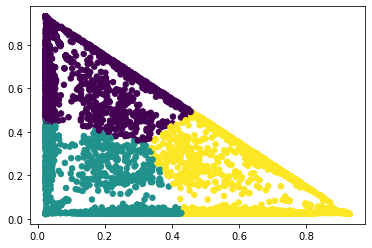

In [25]:
# Plot three cluters
import matplotlib.patches as mpatches
plt.scatter(DF['Three'], DF['Four'], c=y_kmeans, s=30)

In [26]:
data_check = DF.sample(n = 500)
data_check.head(5)

,One,Two,Three,Four,label
4562,0.026857,0.027234,0.027383,0.918525,2
9243,0.272861,0.669286,0.029064,0.028789,1
3242,0.032952,0.033444,0.900274,0.033330,0
5801,0.025955,0.026220,0.025904,0.921921,2
13034,0.224039,0.026306,0.723452,0.026202,0


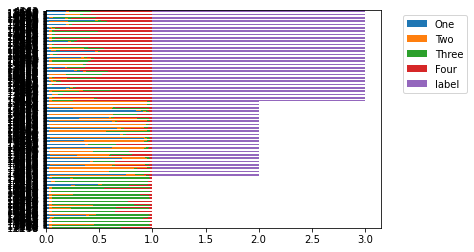

In [27]:
# # Plot probability for all
ax = data_check.sort_values('label').plot.barh(stacked=True, edgecolor='none')
horiz_offset = 1.05
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))
plt.show()